In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None) # display all columns
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857,NaN,NaN,NaN,3.03101,0.969933,1,2,3,4,16
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247,NaN,NaN,NaN,1.05017e+06,641467,85000,635000,870000,1.295e+06,1.12e+07
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1849,6.78889,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


In [4]:
data.shape

(34857, 21)

I want first by using intuition to drop all the columns that are not relevant to the **price** including:
+ Lattitude
+ Longtitude

In [5]:
data.drop(columns=['Lattitude','Longtitude'], inplace=True)

# Data cleaning #

### - Distance ###

In [6]:
data.Distance.value_counts(dropna=False)

 11.2    1420
 13.8     681
 9.2      665
 7.8      662
 10.5     660
 8.4      604
 4.6      585
 14.7     566
 5.2      565
 11.4     521
 13.9     499
 9.7      470
 7.5      468
 6.4      459
 5.3      437
 13.0     427
 14.0     425
 6.2      403
 12.0     400
 16.7     394
 8.8      389
 7.7      384
 6.3      366
 20.6     356
 5.9      353
 12.1     350
 8.0      339
 17.9     338
 2.6      338
 7.0      333
         ... 
 47.4       7
 37.5       7
 39.0       7
 33.3       7
 29.9       7
 17.6       7
 48.1       6
 43.3       6
 3.7        6
 1.4        6
 43.4       5
 18.7       5
 31.6       4
 35.5       4
 30.4       3
 45.2       2
 23.6       2
 29.3       2
 20.1       2
 26.1       2
 34.6       2
 33.8       2
 39.8       2
NaN         1
 31.4       1
 32.6       1
 33.0       1
 22.9       1
 30.6       1
 29.5       1
Name: Distance, Length: 216, dtype: int64

There is only 1 missing value. The mode of this feature has significant counts. Hence, it is plausible to replace this missing value with the mode of this feature.

In [7]:
data.Distance.fillna(data.Distance.mode(), inplace=True)

### - Postcode ###

In [8]:
data[data.Postcode.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It occurs that this row has a lots of missing data. The solution is just drop this because it seems useless.

In [9]:
data.drop(index=29483, inplace=True)

In [10]:
data.reset_index().drop(columns='index', inplace=True)

In [11]:
data.iloc[29483]

Suburb                         Fawkner
Address                   1/1 Clara St
Rooms                                2
Type                                 u
Price                           412000
Method                               S
SellerG                            Ray
Date                         6/01/2018
Distance                          13.1
Postcode                          3060
Bedroom2                             2
Bathroom                             1
Car                                  1
Landsize                           NaN
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea          Hume City Council
Regionname       Northern Metropolitan
Propertycount                     5070
Name: 29484, dtype: object

### - Regionname ###

In [12]:
data.Regionname.value_counts(dropna=False)

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
NaN                               2
Name: Regionname, dtype: int64

In [13]:
data[data.Regionname.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It also shows that these two rows misses alot of features and we want to drop them as above.

In [14]:
data.drop(index=[18523, 26888], inplace=True)
data.reset_index().drop(columns='index', inplace=True)

We might want to take a look at the data again to see which columns need cleaning

In [15]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34854,350,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34854,34006,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34854,NaN,NaN,NaN,3.03107,0.969943,1,2,3,4,16
Type,34854,3,h,23978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27244,NaN,NaN,NaN,1.05021e+06,641492,85000,635000,870000,1.295e+06,1.12e+07
Method,34854,9,S,19743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34854,388,Jellis,3358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34854,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34854,NaN,NaN,NaN,11.1852,6.78898,0,6.4,10.3,14,48.1
Postcode,34854,NaN,NaN,NaN,3116.07,109.026,3000,3051,3103,3156,3978


### - YearBuilt ###

In [16]:
data.YearBuilt[data.YearBuilt >= 2020].value_counts(dropna=False)

2106.0    1
Name: YearBuilt, dtype: int64

This is a typo and the possible data is 2016 instead of 2106.

In [17]:
data.YearBuilt.replace(2106, 2016, inplace=True)

In [18]:
data.YearBuilt.value_counts(dropna=False)

NaN        19303
 1970.0     1490
 1960.0     1260
 1950.0     1089
 1980.0      726
 1900.0      606
 2000.0      571
 1920.0      545
 1930.0      531
 1910.0      460
 1890.0      444
 1940.0      406
 1975.0      387
 2010.0      365
 1990.0      361
 2012.0      333
 2005.0      276
 1965.0      260
 2013.0      247
 2011.0      241
 2009.0      229
 1985.0      229
 1995.0      215
 2014.0      212
 2008.0      202
 2007.0      200
 1955.0      177
 1880.0      171
 1925.0      169
 2004.0      166
           ...  
 1898.0        3
 1932.0        2
 1881.0        2
 1921.0        2
 1931.0        2
 1854.0        2
 1872.0        2
 1901.0        2
 1894.0        2
 1857.0        2
 1909.0        2
 1899.0        2
 1855.0        1
 1871.0        1
 1869.0        1
 1884.0        1
 1896.0        1
 1897.0        1
 2019.0        1
 1942.0        1
 1876.0        1
 1868.0        1
 1800.0        1
 1856.0        1
 1883.0        1
 1196.0        1
 1820.0        1
 1862.0       

In [19]:
data.YearBuilt.corr(data.Price)

-0.33330556412670925

This feature has too maning NaNs and very low correlation with Price. I will drop this column.

In [20]:
data.drop(columns='YearBuilt', inplace=True)

### - BuildingArea ###

In [21]:
data.BuildingArea.value_counts(dropna=False)

NaN         21112
 120.00       185
 100.00       161
 110.00       159
 130.00       153
 115.00       149
 140.00       142
 150.00       136
 160.00       123
 112.00       123
 125.00       119
 105.00       110
 180.00       110
 145.00       102
 108.00       101
 104.00       101
 90.00        100
 102.00       100
 80.00        100
 132.00        99
 135.00        99
 133.00        98
 170.00        96
 95.00         95
 118.00        94
 123.00        94
 138.00        93
 85.00         92
 106.00        92
 103.00        91
            ...  
 463.00         1
 272.40         1
 81.79          1
 438.00         1
 391.00         1
 195.30         1
 603.00         1
 607.00         1
 474.00         1
 446.00         1
 165.50         1
 98.50          1
 122.60         1
 30.60          1
 116.65         1
 664.00         1
 528.00         1
 89.25          1
 69.50          1
 63.40          1
 126.70         1
 92.50          1
 105.90         1
 511.00         1
 157.85   

This feature also misses a lot of data. But this is a very important feature as a guess, I cannot drop this column. Instead, I will drop all of the missing rows.

In [22]:
data = data[pd.notnull(data['BuildingArea'])]

In [23]:
data.loc[data.BuildingArea.idxmax()]

Suburb                           New Gisborne
Address                        71 Hamilton Rd
Rooms                                       5
Type                                        h
Price                               1.355e+06
Method                                      S
SellerG                                 Raine
Date                               23/09/2017
Distance                                 48.1
Postcode                                 3438
Bedroom2                                    5
Bathroom                                    3
Car                                         5
Landsize                                44500
BuildingArea                            44515
CouncilArea      Macedon Ranges Shire Council
Regionname                  Northern Victoria
Propertycount                             849
Name: 22632, dtype: object

I notice this is an outlier with very high price and very large Area, totally distighes itself from all of the others. I would drop this for the sake of regression later.

In [24]:
data.drop(index=data.BuildingArea.idxmax(), inplace=True)

In [25]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,13741,326,Reservoir,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,13741,13488,25 William St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,13741,NaN,NaN,NaN,3.14824,0.97356,1,3,3,4,12
Type,13741,3,h,10412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10655,NaN,NaN,NaN,1.08703e+06,677203,131000,640000,892500,1.33e+06,9e+06
Method,13741,9,S,7644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,13741,296,Nelson,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,13741,78,28/10/2017,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,13741,NaN,NaN,NaN,11.3526,7.09431,0,6.4,10.2,14.2,48.1
Postcode,13741,NaN,NaN,NaN,3118,119.664,3000,3046,3101,3156,3978


We dropped alot of data but an amount of the other NaNs has been removed as well.

### - Landsize ###

In [26]:
data.Landsize.value_counts(dropna=False)

NaN         1602
 0.0        1327
 650.0        94
 697.0        53
 700.0        47
 534.0        45
 400.0        42
 585.0        42
 604.0        41
 600.0        37
 448.0        36
 696.0        34
 652.0        34
 660.0        33
 580.0        32
 613.0        32
 695.0        32
 557.0        31
 581.0        30
 651.0        30
 590.0        30
 530.0        30
 653.0        30
 612.0        28
 603.0        28
 602.0        28
 630.0        28
 589.0        28
 605.0        27
 531.0        27
            ... 
 1678.0        1
 2488.0        1
 1453.0        1
 1116.0        1
 1966.0        1
 1439.0        1
 1317.0        1
 1222.0        1
 1484.0        1
 3701.0        1
 908.0         1
 4676.0        1
 1339.0        1
 1353.0        1
 1155.0        1
 5042.0        1
 3967.0        1
 1334.0        1
 2920.0        1
 4655.0        1
 1237.0        1
 2955.0        1
 23970.0       1
 1384.0        1
 1008.0        1
 1241.0        1
 4401.0        1
 1405.0       

According to the data, we might guess the NaNs data can be replaced with the mode = 0, implying the house only have building area which also makes sense.

In [27]:
data.Landsize.fillna(value=0, inplace=True) # using mode() does not work -> resort to hardcode value 0

### - Car ###

In [28]:
data.Car.value_counts(dropna=False)

 2.0     6347
 1.0     4778
 0.0      823
 3.0      813
 4.0      563
NaN       232
 6.0       81
 5.0       75
 7.0       12
 8.0       10
 9.0        2
 10.0       2
 26.0       1
 11.0       1
 12.0       1
Name: Car, dtype: int64

In this case, it makes sense to replace the NaNs with 0.

In [29]:
data.Car.fillna(value=0, inplace=True)

### - Price ###

This feature is important as it is the output of the upcoming regression model. To train the model, we need all of its data, and the NaNs can be replaced with anything. But at the cost of droping all of the NaNs rows in price, we might miss out on data. Hence, I suggest creating another dataframe for regression while using the old dataframe for data exploration.

In [30]:
import copy
data_regr = copy.copy(data[pd.notnull(data['Price'])])

In [31]:
data_regr.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,10655,324,Reservoir,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,10655,10497,1/1 Clarendon St,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,10655,NaN,NaN,NaN,3.10699,0.960259,1,3,3,4,12
Type,10655,3,h,7942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10655,NaN,NaN,NaN,1.08703e+06,677203,131000,640000,892500,1.33e+06,9e+06
Method,10655,5,S,6740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,10655,268,Nelson,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,10655,77,28/10/2017,331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,10655,NaN,NaN,NaN,11.4876,7.12074,0,6.4,10.4,14.3,48.1
Postcode,10655,NaN,NaN,NaN,3115.61,122.167,3000,3044,3084,3153,3978


I want to check out other columns to see if there is any problems in the data

In [32]:
data.Rooms.value_counts()

3     5844
4     3603
2     2794
5      894
1      483
6      100
7       15
8        6
12       1
10       1
Name: Rooms, dtype: int64

In [33]:
data.Type.value_counts()

h    10412
u     2197
t     1132
Name: Type, dtype: int64

In [34]:
data.Method.value_counts()

S     7644
SP    2167
PI    1888
VB    1171
SN     568
PN     136
SA      86
W       72
SS       9
Name: Method, dtype: int64

In [35]:
data.CouncilArea.value_counts()

Boroondara City Council           1390
Darebin City Council              1040
Moreland City Council              888
Melbourne City Council             764
Glen Eira City Council             745
Moonee Valley City Council         713
Maribyrnong City Council           669
Banyule City Council               649
Bayside City Council               625
Brimbank City Council              601
Hume City Council                  577
Monash City Council                528
Stonnington City Council           523
Port Phillip City Council          513
Yarra City Council                 502
Hobsons Bay City Council           409
Manningham City Council            385
Whittlesea City Council            373
Kingston City Council              320
Wyndham City Council               301
Whitehorse City Council            222
Maroondah City Council             209
Melton City Council                170
Knox City Council                  159
Frankston City Council             141
Greater Dandenong City Co

 # Data Exploration #

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13741.0,3.148242e+00,0.973560,1.0,3.0,3.0,4.0,12.0
Price,10655.0,1.087025e+06,677202.918128,131000.0,640000.0,892500.0,1330000.0,9000000.0
Distance,13741.0,1.135260e+01,7.094310,0.0,6.4,10.2,14.2,48.1
Postcode,13741.0,3.118001e+03,119.663572,3000.0,3046.0,3101.0,3156.0,3978.0
Bedroom2,13741.0,3.126119e+00,0.975032,0.0,3.0,3.0,4.0,12.0
Bathroom,13741.0,1.691143e+00,0.737793,1.0,1.0,2.0,2.0,9.0
Car,13741.0,1.693836e+00,1.023344,0.0,1.0,2.0,2.0,26.0
Landsize,13741.0,4.657016e+02,1013.521599,0.0,126.0,396.0,641.0,42800.0
BuildingArea,13741.0,1.570285e+02,133.539909,0.0,102.0,136.0,188.0,6791.0
Propertycount,13741.0,7.486273e+03,4314.329094,129.0,4387.0,6567.0,10331.0,21650.0


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [38]:
corr = data[['Rooms', 'Price', 'Distance', 
             'Postcode', 'Bedroom2', 'Bathroom', 
             'Car', 'Landsize', 'BuildingArea', 'Propertycount']].corr()

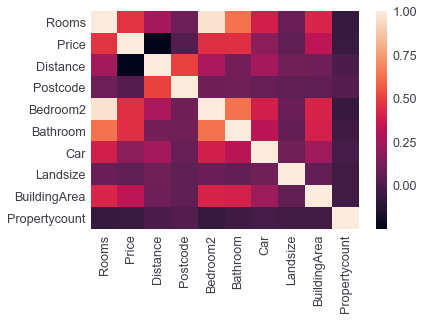

In [39]:
sns.heatmap(corr)

Looking at the correlation heatmap, we see that:
+ **Bedroom2** and **Rooms** have very strong correlation (near to 1)
+ **Bathroom** and **Rooms** also have decent correlation

In [40]:
data[['Rooms','Bedroom2','Bathroom','Price']].corr()

,Rooms,Bedroom2,Bathroom,Price
Rooms,1.000000,0.967827,0.631674,0.464440
Bedroom2,0.967827,1.000000,0.630326,0.451680
Bathroom,0.631674,0.630326,1.000000,0.455932
Price,0.464440,0.451680,0.455932,1.000000


We want a closer look in the correlation matrix of these specific features. Because **Rooms** and **Bedroom2** has near 1 correlation value, we should remove one of them to reduce the dimension. According to the matrix, we choose **Rooms** to keep because it has higher correlation value with **Price**

Among the features, the number of rooms have very high correlation with **Price** but not the **Landsize**.

In [41]:
data.drop(columns='Bedroom2', inplace=True)

In [42]:
data_regr.drop(columns='Bedroom2', inplace=True)

In [43]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,13741,326,Reservoir,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,13741,13488,25 William St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,13741,NaN,NaN,NaN,3.14824,0.97356,1,3,3,4,12
Type,13741,3,h,10412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10655,NaN,NaN,NaN,1.08703e+06,677203,131000,640000,892500,1.33e+06,9e+06
Method,13741,9,S,7644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,13741,296,Nelson,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,13741,78,28/10/2017,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,13741,NaN,NaN,NaN,11.3526,7.09431,0,6.4,10.2,14.2,48.1
Postcode,13741,NaN,NaN,NaN,3118,119.664,3000,3046,3101,3156,3978


In [44]:
#TODO: Date, methode, type

# Regression #

In [45]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

There are many categorical features in the data, I have to first deal with them one by one before I can perform regression. Let's take a look at the categorical variables:

In [46]:
data_regr.describe(include=['O']).T

,count,unique,top,freq
Suburb,10655,324,Reservoir,225
Address,10655,10497,1/1 Clarendon St,3
Type,10655,3,h,7942
Method,10655,5,S,6740
SellerG,10655,268,Nelson,1135
Date,10655,77,28/10/2017,331
CouncilArea,10655,33,Boroondara City Council,919
Regionname,10655,8,Northern Metropolitan,3145


In Australia, Suburbs are contained within Regions and each Suburb as their own Postcode. Knowing this information, we can:
+ drop the **Postcode** feature
+ decide between **Suburb** and **Regionname** feature to use for the regression model

**Suburb** has 324 unique values and dealing with them takes lot of hard work while **Regionname** has only 8 unique value and *One-hot encoding* would suffice. I decide to also drop the Suburb column.

In [47]:
data_regr.drop(columns=['Suburb','Postcode'], inplace=True)

For **Date**, it is safe to say that price won't change much within a year. We will analyse this later if time allows. I will use only *year* in this feature.

In [48]:
import datetime
def to_year(date_str):
    return datetime.datetime.strptime(date_str.strip(),'%d/%m/%Y').year

In [49]:
data_regr['Date'] = data_regr.Date.apply(to_year)

In [50]:
data_regr.Date.value_counts()

2017    5806
2016    3606
2018    1243
Name: Date, dtype: int64

For **Address**, this feature has too many unique value and it is not good if we use *one-hot encode* technique. We might have more interest in the *Street* and hope that the unique value wil decrease such that we can use *one-hot encode*.

In [51]:
import re
def to_street(str):
    return re.sub('[^A-Za-z]+', '', str)

In [52]:
data_regr.Address.apply(to_street).value_counts().count()

5617

It still has up to 6000 unique value. For regression, this column is too diversed. Hence, I drop it.

In [53]:
data_regr.drop(columns='Address', inplace=True)

In [54]:
counts = data_regr.SellerG.value_counts()
counts

Nelson                  1135
Jellis                  1019
Barry                    907
hockingstuart            821
Ray                      615
Marshall                 514
Buxton                   485
Biggin                   275
Brad                     237
Fletchers                229
Greg                     197
Woodards                 189
Jas                      188
McGrath                  184
YPA                      183
Sweeney                  170
Noel                     144
Stockdale                136
Harcourts                136
Raine                    124
Gary                     117
Miles                    115
Hodges                   113
RT                       111
HAR                      101
Village                  101
RW                        96
Love                      86
Williams                  78
O'Brien                   77
                        ... 
Geoff                      1
Zahn                       1
ASL                        1
Allens        

This is also a diversed feature with up to 268 unique values. But we can see that it has many value occurs only once. Let s group all of these values into 'Other' to see if we can deal with this feature.

In [55]:
data_regr.SellerG[data['SellerG'].isin(counts[counts < 100].index)] = 'less than 100'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 100) & (counts < 200)].index)] = '100 - 200'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 200) & (counts < 500)].index)] = '200 - 500'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 500) & (counts < 1000)].index)] = '500 - 1000'
data_regr.SellerG[data['SellerG'].isin(counts[counts > 1000].index)] = 'over 1000'

/Applications/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package s

In [56]:
data_regr.SellerG.value_counts()

500 - 1000       2857
100 - 200        2309
over 1000        2154
less than 100    2109
200 - 500        1226
Name: SellerG, dtype: int64

As we already have the Geo information of the house in the **Regionname** , the **CouncilArea** with 33 unique values can be dropped for convenience.

In [57]:
data_regr.drop(columns='CouncilArea', inplace=True)

Now we have finished dealing with our Categorical variables, let's take a look again at them:

In [58]:
data_regr.describe(include=['O']).T

,count,unique,top,freq
Type,10655,3,h,7942
Method,10655,5,S,6740
SellerG,10655,5,500 - 1000,2857
Regionname,10655,8,Northern Metropolitan,3145


In [59]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,Yarra City Council,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,2.0,2.0,400.0,220.0,Yarra City Council,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,Yarra City Council,Northern Metropolitan,4019.0


In [60]:
data = data.reset_index().drop(columns='index') # do not use inplace=True if combine
data_regr = data_regr.reset_index().drop(columns='index')

In [61]:
data_regr.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
0,2,h,1035000.0,S,200 - 500,2016,2.5,1.0,0.0,156.0,79.0,Northern Metropolitan,4019.0
1,3,h,1465000.0,SP,200 - 500,2017,2.5,2.0,0.0,134.0,150.0,Northern Metropolitan,4019.0
2,4,h,1600000.0,VB,over 1000,2016,2.5,1.0,2.0,120.0,142.0,Northern Metropolitan,4019.0
3,3,h,1876000.0,S,over 1000,2016,2.5,2.0,0.0,245.0,210.0,Northern Metropolitan,4019.0
4,2,h,1636000.0,S,over 1000,2016,2.5,1.0,2.0,256.0,107.0,Northern Metropolitan,4019.0


## One-hot Encode

In [62]:
categoricals = ['Type', 'Method', 'SellerG', 'Regionname', 'Date']
for feature in categoricals:
    df = copy.copy(pd.get_dummies(data_regr[feature], drop_first=True))
    data_regr = pd.concat([data_regr, df], axis=1)
    data_regr.drop(columns=feature, inplace=True)

In [63]:
data_regr.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,t,u,S,SA,SP,VB,200 - 500,500 - 1000,less than 100,over 1000,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,2017,2018
0,2,1035000.0,2.5,1.0,0.0,156.0,79.0,4019.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,3,1465000.0,2.5,2.0,0.0,134.0,150.0,4019.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,4,1600000.0,2.5,1.0,2.0,120.0,142.0,4019.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,3,1876000.0,2.5,2.0,0.0,245.0,210.0,4019.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,2,1636000.0,2.5,1.0,2.0,256.0,107.0,4019.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


Noted that in this case we only take k-1 dummies to reduce the number of dimensions.

In [64]:
data_regr.shape

(10655, 27)

## Linear Regression without PCA ##

### Hold out ###

In [65]:
model_HO = linear_model.LinearRegression()

In [66]:
train, test = train_test_split(data_regr, test_size = 0.2, random_state=512)

In [67]:
train.shape

(8524, 27)

In [68]:
test.shape

(2131, 27)

In [69]:
X_train = train.loc[:, data_regr.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, data_regr.columns != 'Price']
y_test = test.Price

In [70]:
model_HO.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
predict_train = model_HO.predict(X_train.values)
mean_squared_error(y_train, predict_train)

176656210165.35916

In [72]:
predict_test = model_HO.predict(X_test.values)
mean_squared_error(y_test, predict_test)

181721162631.379

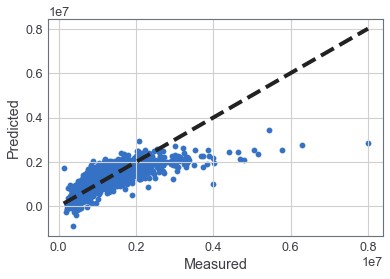

In [73]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Cross validation ###

In [74]:
model_CV = linear_model.LinearRegression()

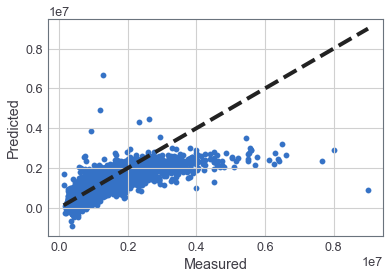

In [75]:
y = data_regr.Price
X = data_regr.loc[:, data_regr.columns != 'Price']
predicted = cross_val_predict(model_CV, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [76]:
mean_squared_error(y.values, predicted)

184196822271.70773

According to the graph and the high value, this model does not perform well. It is possible that the model is too simple for this problem.

## Linear Regression with PCA ##

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=10)

In [79]:
X_new = pd.DataFrame(pca.fit_transform(X.values))

### Hold out ###

In [80]:
model_HO_PCA = linear_model.LinearRegression()

In [81]:
dataPCA = pd.concat([X_new, y], axis=1)

In [82]:
train, test = train_test_split(dataPCA, test_size = 0.2, random_state=512)

In [83]:
X_train = train.loc[:, train.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, test.columns != 'Price']
y_test = test.Price

In [84]:
model_HO_PCA.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
predict_train = model_HO_PCA.predict(X_train.values)
mean_squared_error(y_train, predict_train)

230620974560.76703

In [86]:
predict_test = model_HO_PCA.predict(X_test.values)
mean_squared_error(y_test, predict_test)

230666331328.5386

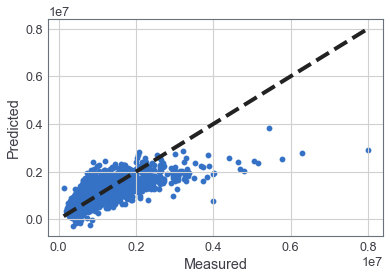

In [87]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Cross validation ###

In [88]:
model_CV_PCA = linear_model.LinearRegression()

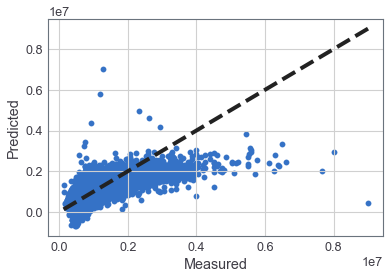

In [89]:
y = dataPCA.Price
X = dataPCA.loc[:, dataPCA.columns != 'Price']
predicted = cross_val_predict(model_CV_PCA, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [90]:
mean_squared_error(y.values, predicted)

240254359958.1386

As expected, the original model with all of the data does not perform as very well, the model with PCA couldnt perform better.

In [91]:
X = data_regr.loc[:, data_regr.columns != 'Price']
y = data_regr.Price

In [92]:
model = linear_model.LinearRegression()

In [93]:
model.fit(X.values, y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
predict = model.predict(X.values)

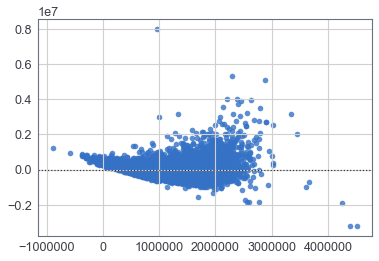

In [95]:
sns.residplot(predict, y.values)

the Residual Plot shows that this model is not a good fit for the problem.

In [96]:
a = (y.values - predict)

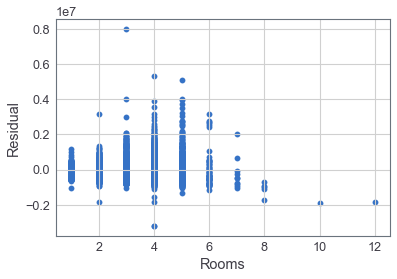

In [97]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Rooms.values, a)
ax.set_xlabel('Rooms')
ax.set_ylabel('Residual')
plt.show()

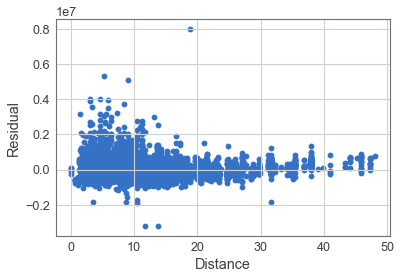

In [98]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Distance.values, a)
ax.set_xlabel('Distance')
ax.set_ylabel('Residual')
plt.show()

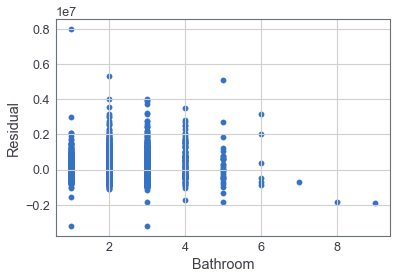

In [99]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Bathroom.values, a)
ax.set_xlabel('Bathroom')
ax.set_ylabel('Residual')
plt.show()

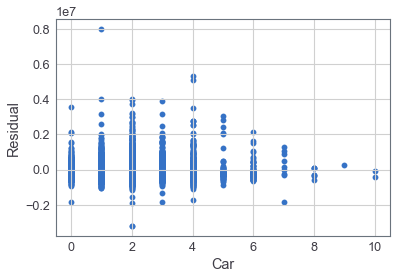

In [100]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Car.values, a)
ax.set_xlabel('Car')
ax.set_ylabel('Residual')
plt.show()

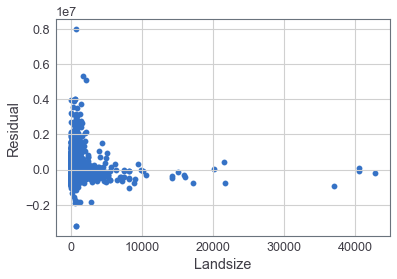

In [101]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Landsize.values, a)
ax.set_xlabel('Landsize')
ax.set_ylabel('Residual')
plt.show()

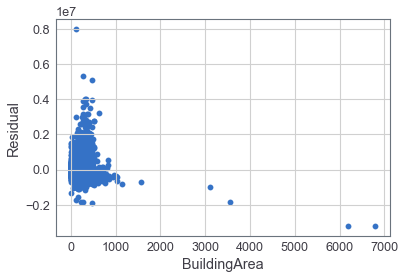

In [102]:
fig, ax = plt.subplots()
ax.scatter(data_regr.BuildingArea.values, a)
ax.set_xlabel('BuildingArea')
ax.set_ylabel('Residual')
plt.show()

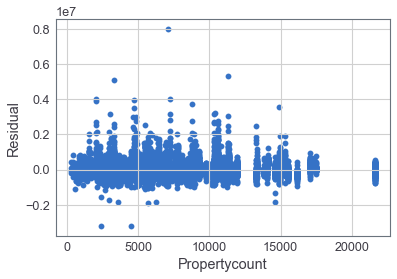

In [103]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Propertycount.values, a)
ax.set_xlabel('Propertycount')
ax.set_ylabel('Residual')
plt.show()